In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#from sklearn.datasets import load_wine
from sklearn import tree
import seaborn as sns
from termcolor import colored
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# This code for kaggle notebook
wine_data = pd.read_csv('../input/wine-quality-dataset/WineQT.csv') 
wine_data

In [9]:
# This code for CoLab notebook 

from google.colab import files
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


In [12]:
wine_data = pd.read_csv('WineQT.csv') 

In [13]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [14]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [16]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol']
X = wine_data[feature_cols] # Features
y = wine_data.quality # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**DTC with GINI** 

In [17]:
wine_clf = DecisionTreeClassifier()
wine_clf = wine_clf.fit(X_train,y_train)
y_pred = wine_clf.predict(X_test)

In [18]:
print(colored('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)),'blue'))

Model accuracy score with criterion gini index: 0.6329


In [19]:
y_pred_train = wine_clf.predict(X_train)

In [20]:
print('Training set score: {:.4f}'.format(wine_clf.score(X_train, y_train)))

print(colored('Test set score: {:.4f}'.format(wine_clf.score(X_test, y_test)),'red'))

Training set score: 1.0000
Test set score: 0.6329


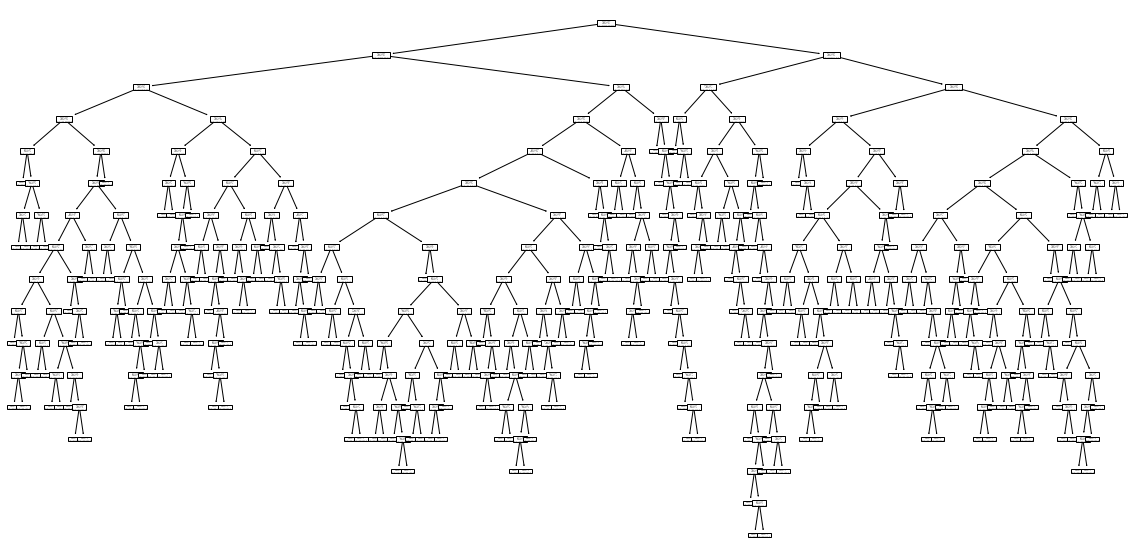

In [22]:
plt.figure(figsize=(20,10))
tree.plot_tree(wine_clf.fit(X_train, y_train));

**DTC with ENTROPY**

In [23]:
wine_clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
wine_clf_en.fit(X_train, y_train)

y_pred_en = wine_clf_en.predict(X_test)
print(colored('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)),'blue'))

Model accuracy score with criterion gini index: 0.5629


In [24]:
print('Training set score: {:.4f}'.format(wine_clf_en.score(X_train, y_train)))
print(colored('Test set score: {:.4f}'.format(wine_clf_en.score(X_test, y_test)),'red'))

Training set score: 0.5858
Test set score: 0.5629


[Text(0.5, 0.875, 'X[10] <= 10.55\nentropy = 1.721\nsamples = 857\nvalue = [6, 30, 362, 341, 109, 9]'),
 Text(0.25, 0.625, 'X[9] <= 0.635\nentropy = 1.422\nsamples = 521\nvalue = [5, 19, 305, 170, 21, 1]'),
 Text(0.125, 0.375, 'X[2] <= 0.055\nentropy = 1.237\nsamples = 328\nvalue = [5, 14, 221, 85, 3, 0]'),
 Text(0.0625, 0.125, 'entropy = 1.723\nsamples = 73\nvalue = [3, 8, 39, 20, 3, 0]'),
 Text(0.1875, 0.125, 'entropy = 1.032\nsamples = 255\nvalue = [2, 6, 182, 65, 0, 0]'),
 Text(0.375, 0.375, 'X[0] <= 10.85\nentropy = 1.538\nsamples = 193\nvalue = [0, 5, 84, 85, 18, 1]'),
 Text(0.3125, 0.125, 'entropy = 1.449\nsamples = 162\nvalue = [0, 4, 83, 64, 10, 1]'),
 Text(0.4375, 0.125, 'entropy = 1.205\nsamples = 31\nvalue = [0, 1, 1, 21, 8, 0]'),
 Text(0.75, 0.625, 'X[1] <= 0.525\nentropy = 1.751\nsamples = 336\nvalue = [1, 11, 57, 171, 88, 8]'),
 Text(0.625, 0.375, 'X[10] <= 11.55\nentropy = 1.606\nsamples = 215\nvalue = [0, 3, 21, 107, 77, 7]'),
 Text(0.5625, 0.125, 'entropy = 1.59\nsamp

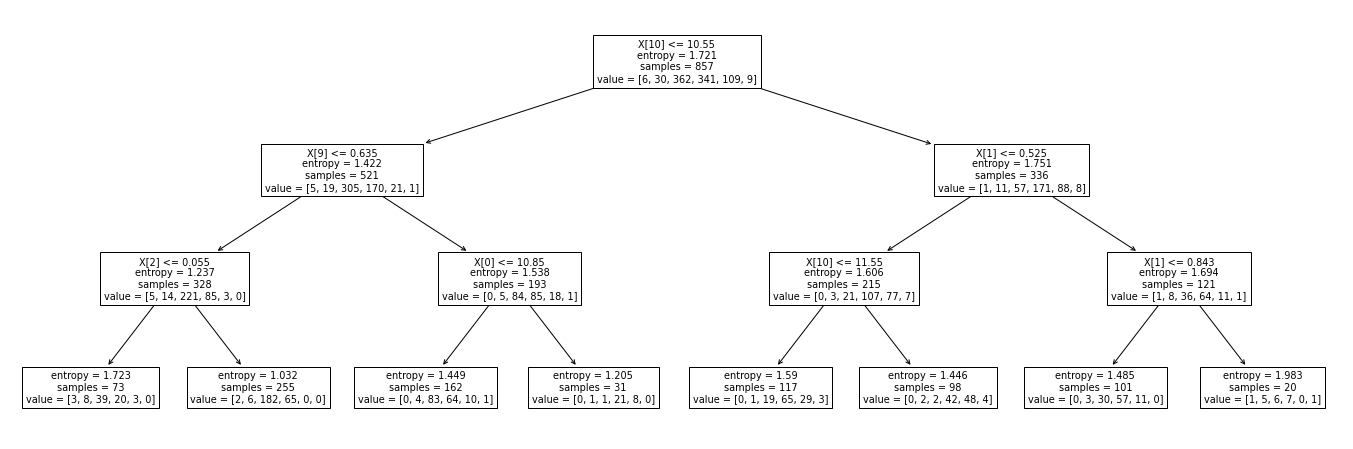

In [25]:
plt.figure(figsize=(24,8))
tree.plot_tree(wine_clf_en.fit(X_train, y_train))

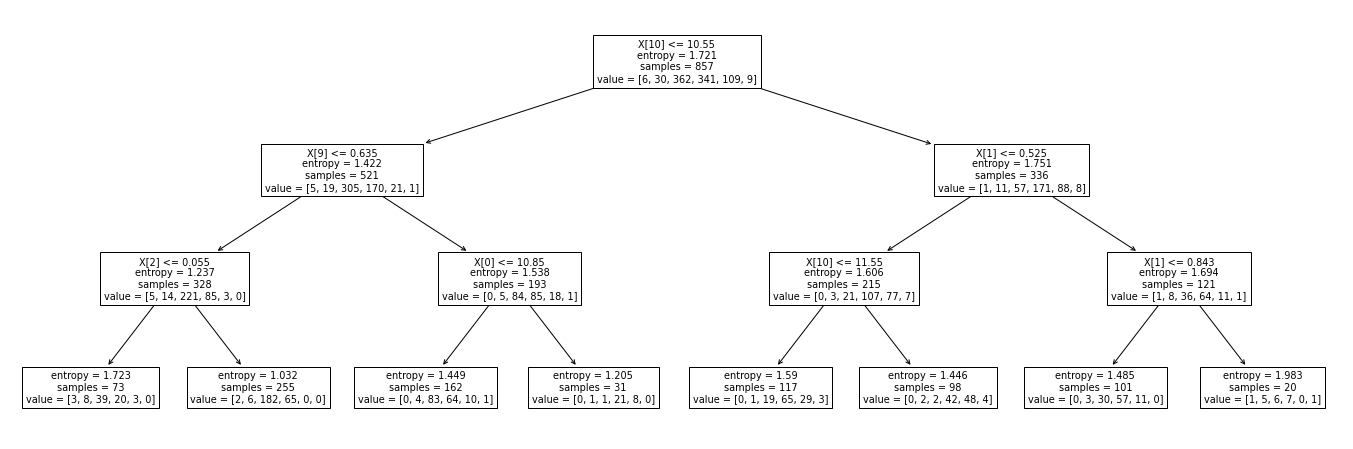

In [26]:
plt.figure(figsize=(24,8))
tree.plot_tree(wine_clf_en.fit(X_train, y_train));

# **RANDOM FOREST** 

In [27]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol']
X = wine_data[feature_cols] # Features
y = wine_data.quality # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
wine_clf_rf = RandomForestClassifier()
wine_clf_rf.fit(X_train,y_train)

wine_clf_rf.fit(X_train,y_train)
y_pred_rf=wine_clf_rf.predict(X_test)

In [29]:
print(colored('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)),'blue'))

Model accuracy score with criterion gini index: 0.7098


In [30]:
y_pred_train_rf = wine_clf_rf.predict(X_train)
print('Training set score: {:.4f}'.format(wine_clf_rf.score(X_train, y_train)))
print(colored('Test set score: {:.4f}'.format(wine_clf_rf.score(X_test, y_test)),'red'))

Training set score: 1.0000
Test set score: 0.7098


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


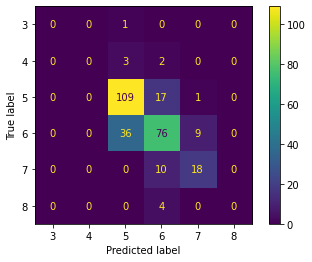

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.73      0.86      0.79       127
           6       0.70      0.63      0.66       121
           7       0.64      0.64      0.64        28
           8       0.00      0.00      0.00         4

    accuracy                           0.71       286
   macro avg       0.35      0.35      0.35       286
weighted avg       0.68      0.71      0.69       286



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
preds = wine_clf_rf.predict(X_test)
plot_confusion_matrix(wine_clf_rf, X_test, y_test)
plt.show()
print(classification_report(y_test, preds))

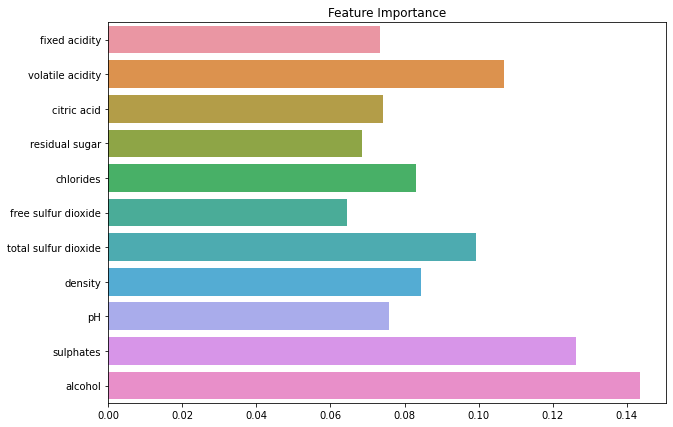

In [32]:
plt.figure(figsize=(10, 7))
sns.barplot(y=X_train.columns, x=wine_clf_rf.feature_importances_, )
plt.title("Feature Importance")
plt.show()